In [229]:
# Import packages
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Question 1: (10 points) Exploratory Analysis

In [28]:
# Load training and testing datasets into pandas dataframes
# Your Code goes here:
news_train = pd.read_csv('20ng_train.csv', compression='bz2')
news_test = pd.read_csv('20ng_test.csv', compression='bz2')
news_labels = pd.read_csv('20ng_labels.csv', compression='bz2')

In [29]:
# Extract features and targets into separate dataframes
X_train = news_train.drop('class', axis=1)
y_train = news_train['class']
X_test = news_test.drop('class', axis=1)
y_test = news_test['class']

In [30]:
type(news_labels)

pandas.core.frame.DataFrame

/Users/celinadong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


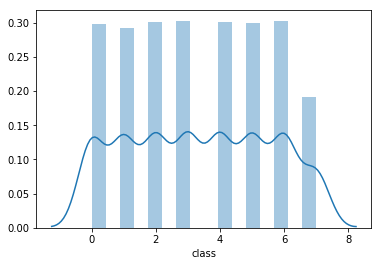

In [222]:
sns.distplot(y_train)

## 1.1 (5 points)

In [31]:
X_train.head()

,__,ability,able,ac,accept,access,according,account,act,action,...,world,worth,wouldn,write,written,wrong,wrote,year,years,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.111667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
print("Training set shape: {}".format(X_train.shape))
print("Number of instances in training set: {}".format(X_train.shape[0]))
print("Number of attributes in training set: {}".format(X_train.shape[1]))

Training set shape: (5648, 1000)
Number of instances in training set: 5648
Number of attributes in training set: 1000


In [33]:
# Summarise key features/observations
X_train.describe()

,__,ability,able,ac,accept,access,according,account,act,action,...,world,worth,wouldn,write,written,wrong,wrote,year,years,yes
count,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,...,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000
mean,0.001708,0.001472,0.006335,0.002273,0.002466,0.004041,0.002923,0.001420,0.002057,0.001560,...,0.006102,0.003717,0.004887,0.003494,0.002800,0.006421,0.001851,0.006020,0.008144,0.006705
std,0.034360,0.016554,0.033866,0.026688,0.022362,0.030053,0.024208,0.018515,0.020301,0.020248,...,0.034573,0.028373,0.033153,0.027797,0.025441,0.037083,0.020132,0.036011,0.037727,0.039841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.956585,0.443807,0.565277,0.711480,0.529982,0.635985,0.560049,0.461537,0.657318,0.631932,...,0.487020,0.614346,0.698880,0.511068,0.596214,0.751603,0.561412,0.617048,0.438414,0.736056


In [34]:
X_train.std

<bound method DataFrame.std of             __   ability      able   ac    accept    access  according  \
0     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
1     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
2     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
3     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
4     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
5     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
6     0.000000  0.000000  0.000000  0.0  0.000000  0.186521   0.000000   
7     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
8     0.000000  0.000000  0.000000  0.0  0.182272  0.000000   0.000000   
9     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
10    0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
11    0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
12    0

In [35]:
X_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5648 entries, 0 to 5647
Data columns (total 1000 columns):
__                5648 non-null float64
ability           5648 non-null float64
able              5648 non-null float64
ac                5648 non-null float64
accept            5648 non-null float64
access            5648 non-null float64
according         5648 non-null float64
account           5648 non-null float64
act               5648 non-null float64
action            5648 non-null float64
acts              5648 non-null float64
actual            5648 non-null float64
actually          5648 non-null float64
adapter           5648 non-null float64
add               5648 non-null float64
added             5648 non-null float64
addition          5648 non-null float64
address           5648 non-null float64
administration    5648 non-null float64
advance           5648 non-null float64
advice            5648 non-null float64
agencies          5648 non-null float64
ago        

In [36]:
X_train.memory_usage

<bound method DataFrame.memory_usage of             __   ability      able   ac    accept    access  according  \
0     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
1     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
2     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
3     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
4     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
5     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
6     0.000000  0.000000  0.000000  0.0  0.000000  0.186521   0.000000   
7     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
8     0.000000  0.000000  0.000000  0.0  0.182272  0.000000   0.000000   
9     0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
10    0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000   
11    0.000000  0.000000  0.000000  0.0  0.000000  0.000000   0.000000  

In [37]:
X_train.quality.unique()

array([0.        , 0.0908523 , 0.13601567, 0.19678107, 0.15440511,
       0.14396753, 0.12730117, 0.07006661, 0.22701047, 0.08481791,
       0.15774315, 0.29772649, 0.35645334, 0.12839352, 0.16971799,
       0.07351956, 0.33319539, 0.17802163, 0.3381777 , 0.09710127,
       0.13315821, 0.051885  , 0.29322478, 0.2158262 , 0.20720301,
       0.00841932, 0.30938955, 0.20488814, 0.09310927, 0.18295856,
       0.0913593 , 0.14948791, 0.09267912, 0.37643013, 0.16865742,
       0.14340231, 0.17881821, 0.39872721, 0.31461694, 0.13672235,
       0.11787535, 0.17503031, 0.12223227, 0.13305621, 0.17429061,
       0.1367667 , 0.44695112, 0.0447541 , 0.13262213, 0.16515125,
       0.14022853, 0.19978733, 0.10254236, 0.13761929, 0.5107998 ,
       0.44055751, 0.1695923 , 0.08980128, 0.1817697 , 0.27672505,
       0.27274511, 0.25454658, 0.20342756, 0.1266081 , 0.23316747,
       0.17190889, 0.24166391, 0.25318153, 0.00787491, 0.08807445,
       0.11213587, 0.35453625, 0.07923626, 0.11200717, 0.21114

In [38]:
len(X_train.quality.unique())

110

In [39]:
110/5648

0.019475920679886686

In [40]:
X_train.quality.value_counts()

0.000000    5539
0.333195       1
0.182959       1
0.163882       1
0.241664       1
0.112007       1
0.333342       1
0.199787       1
0.091359       1
0.204888       1
0.118638       1
0.154434       1
0.595243       1
0.136722       1
0.052780       1
0.093109       1
0.037231       1
0.334568       1
0.171909       1
0.128394       1
0.088074       1
0.112136       1
0.215826       1
0.174291       1
0.356453       1
0.133056       1
0.204958       1
0.309390       1
0.070067       1
0.132622       1
            ... 
0.254547       1
0.175030       1
0.008419       1
0.272745       1
0.003974       1
0.073520       1
0.114606       1
0.274923       1
0.013383       1
0.007875       1
0.089801       1
0.211147       1
0.203428       1
0.168657       1
0.196781       1
0.117875       1
0.097101       1
0.136767       1
0.510800       1
0.207203       1
0.154405       1
0.143402       1
0.056753       1
0.471714       1
0.102542       1
0.009661       1
0.209283       1
0.099313      

#### ANSWER

The training set comprises of 5648 instances and 1000 attributes (features). We observe that the data ranges from 0 to 1 given that the minimum value for all the attributes is 0 and the maximum never goes over 1. All the attributes are non-null, and all of them are of type float64. From the data obtained by the describe() function, we see that the mean value for each attribute is quite low, although they seem like they're greater than the median. Also, it seems that the values for all the percentiles are 0. By comparing the 75th percentile against the max value for each of the attributes, we could deduce that there exists outliers in the data set.

By applying the quality.unique() function to the dataset, we observe that there are only 110 different unique values in our dataset, and using the quality.value_counts() functions it seems that all of those values only have 1 count except for 0. In fact, the typical values of the features is 0; 5539 of our instances are take value 0 in our dataset. (5648_totalInstances - 5539_zeros = 109)

The memory usage is a total of 43.1 MB.

## 1.2 (3 points)

In [41]:
X_test.head()

,__,ability,able,ac,accept,access,according,account,act,action,...,world,worth,wouldn,write,written,wrong,wrote,year,years,yes
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.223984,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
print("Testing set shape: {}".format(X_test.shape))
print("Number of instances in testing set: {}".format(X_test.shape[0]))
print("Number of attributes in testing set: {}".format(X_test.shape[1]))

Testing set shape: (1883, 1000)
Number of instances in testing set: 1883
Number of attributes in testing set: 1000


In [43]:
X_test.describe()

,__,ability,able,ac,accept,access,according,account,act,action,...,world,worth,wouldn,write,written,wrong,wrote,year,years,yes
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.002292,0.002168,0.007335,0.002817,0.002701,0.004449,0.003012,0.001716,0.001886,0.001745,...,0.006194,0.003018,0.005356,0.003746,0.003812,0.007960,0.001970,0.006214,0.008706,0.009449
std,0.032391,0.021397,0.034312,0.032169,0.021777,0.032393,0.026133,0.022855,0.019504,0.018376,...,0.041170,0.026231,0.033441,0.028779,0.032836,0.039182,0.020613,0.037389,0.041551,0.043570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.864159,0.469412,0.337561,0.620254,0.310053,0.504324,0.420903,0.632166,0.336667,0.387412,...,1.000000,0.490894,0.481298,0.434553,0.543384,0.470697,0.566179,0.537827,0.532047,0.590114


In [44]:
X_test.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 1000 columns):
__                1883 non-null float64
ability           1883 non-null float64
able              1883 non-null float64
ac                1883 non-null float64
accept            1883 non-null float64
access            1883 non-null float64
according         1883 non-null float64
account           1883 non-null float64
act               1883 non-null float64
action            1883 non-null float64
acts              1883 non-null float64
actual            1883 non-null float64
actually          1883 non-null float64
adapter           1883 non-null float64
add               1883 non-null float64
added             1883 non-null float64
addition          1883 non-null float64
address           1883 non-null float64
administration    1883 non-null float64
advance           1883 non-null float64
advice            1883 non-null float64
agencies          1883 non-null float64
ago        

In [45]:
len(X_test.quality.unique())

32

In [46]:
X_test.quality.value_counts()

0.000000    1852
0.344434       1
0.249982       1
0.304280       1
0.203071       1
0.117035       1
0.123364       1
0.165148       1
0.103125       1
0.247344       1
0.129252       1
0.047553       1
0.294186       1
0.244767       1
0.199792       1
0.099062       1
0.170114       1
0.084507       1
0.141501       1
0.039539       1
0.342105       1
0.206439       1
0.140850       1
0.265002       1
0.199736       1
0.260946       1
0.150569       1
0.181419       1
0.326800       1
0.191596       1
0.131398       1
0.176541       1
Name: quality, dtype: int64

#### ANSWER

In the testing set, we have less instances than in the training set, 1883 instances. The number of attributes remains the same. All the values are non-null of type float64. We have 32 unique values, 32/1883=0.017, the proportion of unique values is slightly lower than the one we have for our training dataset 110/5648=0.019. In general, discarding the value 0, we observe that the values in training dataset are different to those in testing dataset. When splitting the training and testing datasets, it is preferred that the testing dataset contains instances that our model has never seen before. This way, we will know if our model has overfit to our training set, and the comparison of its performance on the testing set. If the performance on the testing set is relatively good and does not differ by much from that of the training set, then we can say our model generalises data quite well.

## 1.3 (2 points)

TF-IDF balances out the frequency of words by how often they appear across all documents. The weights for each word are different, they highlight rare words and penalize common meaningless words.

TF-IDF reflects how relevant a word in a document is. The relevance of a word is obtained by counting the frequency of a certain word in a specific document, and we then see the frequency of this word across the rest of our documents in the corpus. It might be the case that the word is really frequent in general, such as 'the' or other stopwords, but are not really relevant or meaningful. TF-IDF reduces the weight of these common meaningless words and gives higher weight to uncommon words in a document. For instance, a document about Business would highlight words like 'enterprise' and 'stakeholder'.

If we used the number of times a word appears in a document, then we would get that extremely frequent words dominate in some documents, even though they do not provide any useful information to our model.

# Question 2: (24 points) Unsupervised Learning

## 2.1 (2 points)

The K-Means algorithm is non-deterministic because if we were to run the algorithm on the same dataset various times, we could get different results and classifications. That is, the algorithm starts with an initial set of k cluster centres randomly selected, and classifies the data points according to these centroids and then recomputes the centroids. Given that the initial centroids for the algorithm are randomly selected, on different executions of the algorithm, we get different outputs for the same dataset inputted. This makes the results obtained hard to compare.

The scikit-learn K-means algorithm stops when the difference between the previous and new centroids is less than a specific threshold. It uses the threshold as a stopping criterion for the algorithm, and it usually stops when the relative decrese in the objective function between iterations is less than the given tolerance value. That is, the algorithm runs until the centroids of the clusters do not change significantly (move less than the tolerance). The final model is the one obtained when we stop after reaching the threshold.

## 2.2 (1 point)

In [116]:
news_labels

,0
0,comp.sys.ibm.pc.hardware
1,comp.sys.mac.hardware
2,rec.autos
3,rec.motorcycles
4,sci.crypt
5,sci.electronics
6,soc.religion.christian
7,talk.religion.misc


In [22]:
len(y_train.unique())

8

A reasonable number of clusters for our newsgroups problem is the number of distinct classes we have in the dataset, that is, 8. We observe that all our instances are classified to one of the classes which we can find in the news_labels dataframe. By using the number of classes as the number of clusters for k-means, we are clustering the instances in 8 different clusters (each corresponding to one news label). This way, we will obtain the label that corresponds to each data point.

## 2.3 (5 points)

MI measures how accurate the clustering algorithm's label predictions are compared to the actual true labels, that is, the agreement of the two assignments ignoring permutations. In other words, Mutual Information measures how related to variables are to each other. It provides a general measure based on the joint probabilities of two variables assuming no underlying relationship (like linearity). MI is capable of identifying more information about the relationship of two variables than correlation can.

MI = 0 is mathematically equivalent to independence.

"MI is directly interpreted as the amount of shared information between two datasets in the unit of bits"
"Mutual information calculates the statistical dependence between two variables and is the name given to information gain when applied to variable selection."

The entropy is the amount of uncertainty for a 


Expression for the MI in terms of entropy is MI(U,V) = 

In [23]:
# GIVE EXPRESSION FOR THE MI IN TERMS OF ENTROPY

# What does MI measure about two variables, why is this applicable here and why is it difficult in practice.

MI measures how accurate the clustering algorithm's label predictions are compared to the actual true labels.
AMI is normalized against chance, that is, it takes into account that the MI is in general higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared.

This metric is independent of the absolute values of the labels, i.e., a permutation of the class or cluster label values will not change the score value in any way.
It is symmetric, switching label_true with label_pred gives the same score value. Useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is unknown.

Returns a value of 1 when the two partitions are identical (perfectly matched). Random partitions (independent labellings) have an expected AMI around 0 on average, hence can be negative.

In practice, this metric might be difficult to use because we might not always have the ground truth labels of the instances, so we cannot compare the predicted labels against these. In general, we use unsupervised learning to determine the clusters and possible classifications of our data when we do not have labels.

## 2.4 (4 points)

In [127]:
n_clusters = list(range(2, 13))
random_seed = 1000
n_init = 50
AMI = []

for n in n_clusters:
    kmeans_model = KMeans(n_clusters=n, n_init=n_init, random_state=random_seed)
    kmeans_model.fit(X_train)
    pred = kmeans_model.predict(X_train)
    ami = adjusted_mutual_info_score(y_train, pred, average_method='max')
    AMI.append(ami)
    print("{} clusters ---- AMI score {}".format(n, ami))

2 clusters ---- AMI score 0.09833132888683942
3 clusters ---- AMI score 0.19754027411318142
4 clusters ---- AMI score 0.2564638316247759
5 clusters ---- AMI score 0.2440905472039343
6 clusters ---- AMI score 0.27950160086669634
7 clusters ---- AMI score 0.3006931187647016
8 clusters ---- AMI score 0.3275775886318796
9 clusters ---- AMI score 0.33434188812656024
10 clusters ---- AMI score 0.3052821758304732
11 clusters ---- AMI score 0.3045520448835263
12 clusters ---- AMI score 0.2976031041980303


In [111]:
AMI

[0.09833132888683942,
 0.19754027411318142,
 0.2564638316247759,
 0.2440905472039343,
 0.27950160086669634,
 0.3006931187647016,
 0.3275775886318796,
 0.33434188812656024,
 0.3052821758304732,
 0.3045520448835263,
 0.2976031041980303]

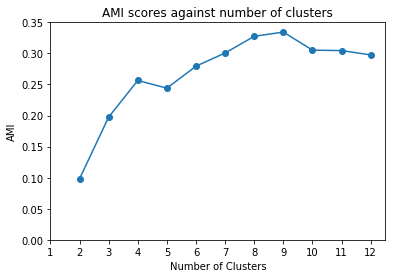

In [128]:
plt.plot(n_clusters, AMI, marker='o')
plt.xticks(np.arange(1, 13, 1.0))
plt.yticks(np.arange(0, max(AMI)+0.05, 0.05))
plt.xlabel('Number of Clusters')
plt.ylabel('AMI')
plt.title('AMI scores against number of clusters')
plt.show()

## 2.5 (3 points)

In [124]:
print("9 clusters: " + str(max(AMI)))
print("2 clusters: " + str(min(AMI)))

9 clusters: 0.33434188812656024
2 clusters: 0.09833132888683942


From the lineplot, we observe that the AMI increases as the number of clusters increases, until we reach a specific number of clusters (9 clusters). As we increase the clusters from 9 onwards, the AMI slowly decreases.

## 2.6 (6 points)

In [198]:
ax.patches?

In [201]:
# K Means clustering with K=4
kmeans_four = KMeans(n_clusters=4, n_init=50, random_state=1000)
kmeans_four.fit(X_train)
#pred_labels = kmeans_four.predict(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=50, n_jobs=None, precompute_distances='auto',
    random_state=1000, tol=0.0001, verbose=0)

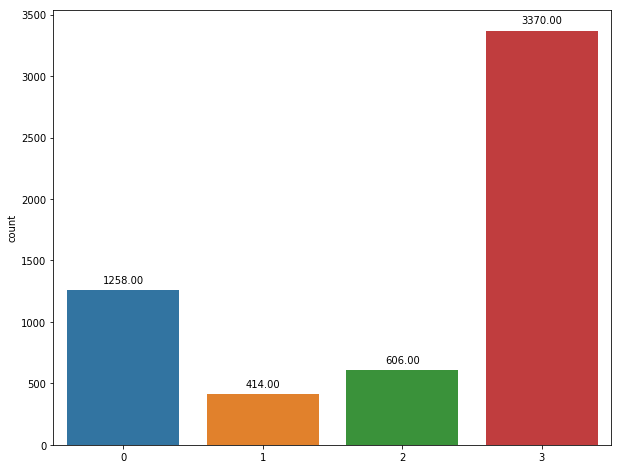

In [212]:
news_labels_list = [i[0] for i in news_labels.values]
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x=kmeans_four.labels_)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

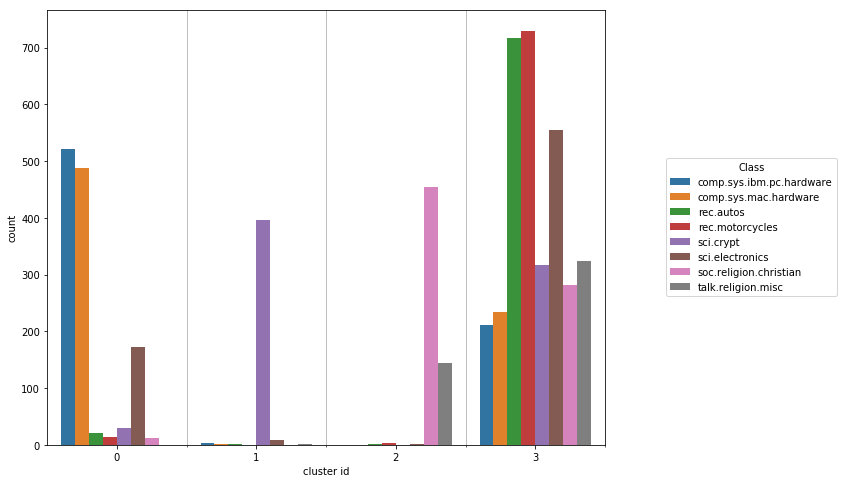

In [219]:
# Plot bar chart
news_labels_list = [i[0] for i in news_labels.values]
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x=kmeans_four.labels_, hue=y_train.values, ax=ax) #data=X_train)
ax.legend(labels=news_labels_list, #  mixture class does not appear
          loc='center left', bbox_to_anchor=[1.1, 0.5], title='Class')
# for p in ax.patches:
#     ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#             height + 3,
#             '{:1.2f}'.format(height/float(X_train.shape[0])),
#             ha="center") 
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
#                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.gca().set_xticks([i + 0.5 for i in range(4)], minor=True)
plt.grid(True, which='minor')
plt.xlabel('cluster id')
plt.show()

#ENCODED BY POSITION ON THE PLOTS X AXIS??

## 2.7 (3 points)

### TODO
We observe that the clustering and the true labels do align relatively well. Both the blue and orange bars belong to the class comp, and we observe that both of these are grouped together in cluster 0. As for cluster 1, we observe that it clearly aligns with sci.crypt class. Regarding cluster 2, most of the datapoints belong to soc.religion.christian class. However, in cluster 3, although the rec classes dominate the cluster, we see that quite a lot of datapoints of class sci.electronics are assigned to this cluster.


# Question 3: (26 points) Logistic Regression Classification

In [231]:
# 10-fold stratified split of data
# Cross-validation object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

## 3.1 (3 points)

F1 score is a weighted average of the precision and recall. It is preferable in our problem because we want a balance between the precision and recall. Accuracy largely is largely contributed by a large number of True Negatives, which is not of our interest in this problem setting because we have a multiclass classification problem where we would also like to know what labels we assign to incorrectly labelled news, that is, False Negatives and False Positives.

##### f1 score is preferable when the distribution of the classes is uneven

The macro-average performance in a multiclass classification computes the F1-score differently for each class and then takes the average

## 3.2 (2 points)

In [223]:
from sklearn.dummy import DummyClassifier

In [228]:
# Baseline classifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
preds = dummy.predict(X_test)

# Compute f1 score
f1_score(y_test, preds, average='macro')

0.11890325353144071

## 3.3 (3 points)

Logistic Regression applied to classify multi-class labels

## 3.4 (4 points)

In [230]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0)
skf = 

## 3.5 (5 points)

## 3.6 (7 points)

## 3.7 (2 points)